## sınıflandırma

In [1]:
import tensorflow as tf
import numpy
import seaborn as sbn
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataF=pd.read_excel("MaliciousOrNot.xlsx")

In [7]:
#dataF.info()
#non-null
dataF.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


<AxesSubplot:xlabel='Type', ylabel='count'>

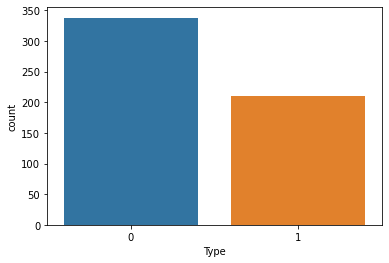

In [8]:
sbn.countplot(x="Type", data = dataF)

<AxesSubplot:>

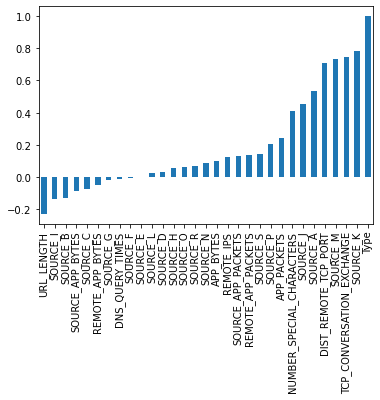

In [10]:
dataF.corr()["Type"].sort_values().plot(kind="bar")

In [12]:
#y=ax+b
y = dataF["Type"].values
x = dataF.drop("Type",axis = 1).values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
#overfitting olayı olursa earlystopping ve dropout kullanırız

In [22]:
x_train.shape#(383, 30)

(383, 30)

In [23]:
model=Sequential()
model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
# son nerona sigmoid verilirse 0 veya 1
model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")
#loss eskisen mse idi ama şuan 0 veya 1 ile işlem yapıyoruz


In [25]:
model.fit(x=x_train, y=y_train, epochs=700,validation_data=(x_test,y_test),verbose=1)
#amacımız overfiting yapmak bu sebeple epochs 700 oldu

Epoch 1/700
12/12 [==============================] - 0s 25ms/step - loss: 0.6879 - val_loss: 0.6811
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6744 - val_loss: 0.6710
Epoch 3/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6575 - val_loss: 0.6575
Epoch 4/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6368 - val_loss: 0.6388
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6111 - val_loss: 0.6113
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5789 - val_loss: 0.5824
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5405 - val_loss: 0.5461
Epoch 8/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4940 - val_loss: 0.4952
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4435 - val_loss: 0.4509
Epoch 10/700
12/12 [==============================] - 0s 4ms/step - loss: 0.3923 - val_loss: 0.4057
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.0431 - val_loss: 0.2051
Epoch 83/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0429 - val_loss: 0.2023
Epoch 84/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0429 - val_loss: 0.2099
Epoch 85/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0416 - val_loss: 0.2033
Epoch 86/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0415 - val_loss: 0.2100
Epoch 87/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.2047
Epoch 88/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0416 - val_loss: 0.2056
Epoch 89/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.1978
Epoch 90/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.2069
Epoch 91/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.2068
Epoch 92/700


12/12 [==============================] - 0s 3ms/step - loss: 0.0145 - val_loss: 0.2195
Epoch 164/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0146 - val_loss: 0.2234
Epoch 165/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.2193
Epoch 166/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0159 - val_loss: 0.2229
Epoch 167/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.2277
Epoch 168/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0136 - val_loss: 0.2238
Epoch 169/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.2223
Epoch 170/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0139 - val_loss: 0.2254
Epoch 171/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.2237
Epoch 172/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0196 - val_loss: 0.2339
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 0.0059 - val_loss: 0.2809
Epoch 245/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.2757
Epoch 246/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.2758
Epoch 247/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.2799
Epoch 248/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0054 - val_loss: 0.2847
Epoch 249/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 0.2805
Epoch 250/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.2759
Epoch 251/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.2820
Epoch 252/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.2819
Epoch 253/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.2789
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.3232
Epoch 326/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.3233
Epoch 327/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.3335
Epoch 328/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.3255
Epoch 329/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.3309
Epoch 330/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.3234
Epoch 331/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.3219
Epoch 332/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.3458
Epoch 333/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.3227
Epoch 334/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.3288
Epoc

Epoch 406/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.3713
Epoch 407/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.3698
Epoch 408/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.3695
Epoch 409/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.3818
Epoch 410/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.3649
Epoch 411/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.3697
Epoch 412/700
12/12 [==============================] - 0s 3ms/step - loss: 9.9417e-04 - val_loss: 0.3750
Epoch 413/700
12/12 [==============================] - 0s 3ms/step - loss: 9.3366e-04 - val_loss: 0.3752
Epoch 414/700
12/12 [==============================] - 0s 3ms/step - loss: 9.5414e-04 - val_loss: 0.3732
Epoch 415/700
12/12 [==============================] - 0s 4ms/step - loss: 0.00

12/12 [==============================] - 0s 3ms/step - loss: 5.8318e-04 - val_loss: 0.4047
Epoch 485/700
12/12 [==============================] - 0s 3ms/step - loss: 8.0733e-04 - val_loss: 0.4208
Epoch 486/700
12/12 [==============================] - 0s 4ms/step - loss: 7.0451e-04 - val_loss: 0.4104
Epoch 487/700
12/12 [==============================] - 0s 4ms/step - loss: 6.1152e-04 - val_loss: 0.4142
Epoch 488/700
12/12 [==============================] - 0s 4ms/step - loss: 4.5226e-04 - val_loss: 0.4088
Epoch 489/700
12/12 [==============================] - 0s 4ms/step - loss: 4.6035e-04 - val_loss: 0.4167
Epoch 490/700
12/12 [==============================] - 0s 4ms/step - loss: 4.9028e-04 - val_loss: 0.4124
Epoch 491/700
12/12 [==============================] - 0s 4ms/step - loss: 4.4429e-04 - val_loss: 0.4154
Epoch 492/700
12/12 [==============================] - 0s 4ms/step - loss: 5.4231e-04 - val_loss: 0.4176
Epoch 493/700
12/12 [==============================] - 0s 4ms/step - 

12/12 [==============================] - 0s 3ms/step - loss: 2.2901e-04 - val_loss: 0.4461
Epoch 563/700
12/12 [==============================] - 0s 4ms/step - loss: 2.3158e-04 - val_loss: 0.4462
Epoch 564/700
12/12 [==============================] - 0s 4ms/step - loss: 2.4148e-04 - val_loss: 0.4470
Epoch 565/700
12/12 [==============================] - 0s 4ms/step - loss: 2.3924e-04 - val_loss: 0.4481
Epoch 566/700
12/12 [==============================] - 0s 4ms/step - loss: 2.8456e-04 - val_loss: 0.4484
Epoch 567/700
12/12 [==============================] - 0s 4ms/step - loss: 2.3832e-04 - val_loss: 0.4475
Epoch 568/700
12/12 [==============================] - 0s 4ms/step - loss: 2.4394e-04 - val_loss: 0.4492
Epoch 569/700
12/12 [==============================] - 0s 4ms/step - loss: 2.2248e-04 - val_loss: 0.4493
Epoch 570/700
12/12 [==============================] - 0s 4ms/step - loss: 2.2165e-04 - val_loss: 0.4508
Epoch 571/700
12/12 [==============================] - 0s 4ms/step - 

12/12 [==============================] - 0s 4ms/step - loss: 1.1854e-04 - val_loss: 0.4886
Epoch 641/700
12/12 [==============================] - 0s 4ms/step - loss: 1.2478e-04 - val_loss: 0.4909
Epoch 642/700
12/12 [==============================] - 0s 3ms/step - loss: 1.2347e-04 - val_loss: 0.4919
Epoch 643/700
12/12 [==============================] - 0s 3ms/step - loss: 1.5370e-04 - val_loss: 0.4907
Epoch 644/700
12/12 [==============================] - 0s 4ms/step - loss: 1.1947e-04 - val_loss: 0.4937
Epoch 645/700
12/12 [==============================] - 0s 4ms/step - loss: 1.3292e-04 - val_loss: 0.4924
Epoch 646/700
12/12 [==============================] - 0s 3ms/step - loss: 1.1950e-04 - val_loss: 0.4933
Epoch 647/700
12/12 [==============================] - 0s 3ms/step - loss: 1.1561e-04 - val_loss: 0.4948
Epoch 648/700
12/12 [==============================] - 0s 3ms/step - loss: 1.2169e-04 - val_loss: 0.4947
Epoch 649/700
12/12 [==============================] - 0s 3ms/step - 

In [26]:
modelloss=model.history.history

<AxesSubplot:>

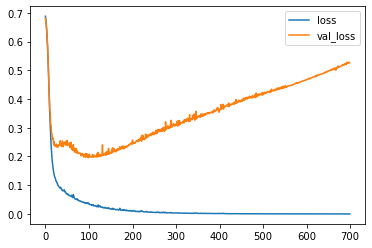

In [31]:
modelloss=pd.DataFrame(modelloss)
modelloss.plot()
#ipochs çok olduğu için overfishing oldu
#bunu için earlystopping 

In [32]:
model=Sequential()
model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
# son nerona sigmoid verilirse 0 veya 1
model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")
#loss eskisen mse idi ama şuan 0 veya 1 ile işlem yapıyoruz


In [35]:
earlystopping=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [37]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlystopping])

Epoch 1/700
12/12 [==============================] - 0s 19ms/step - loss: 0.6880 - val_loss: 0.6855
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6724 - val_loss: 0.6742
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6534 - val_loss: 0.6609
Epoch 4/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6319 - val_loss: 0.6384
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5991 - val_loss: 0.6085
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5561 - val_loss: 0.5701
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5044 - val_loss: 0.5273
Epoch 8/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4482 - val_loss: 0.4799
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3959 - val_loss: 0.4392
Epoch 10/700
12/12 [==============================] - 0s 4ms/step - loss: 0.3507 - val_loss: 0.4089
Epoch 11

Epoch 83/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0557 - val_loss: 0.1728
Epoch 84/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0556 - val_loss: 0.1528
Epoch 85/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0461 - val_loss: 0.1570
Epoch 86/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0444 - val_loss: 0.1522
Epoch 87/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0492 - val_loss: 0.1516
Epoch 88/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0459 - val_loss: 0.1519
Epoch 89/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0471 - val_loss: 0.1535
Epoch 90/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0461 - val_loss: 0.1510
Epoch 91/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0475 - val_loss: 0.1480
Epoch 92/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0411 - val_loss: 0.1475


12/12 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.1187
Epoch 165/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0183 - val_loss: 0.1220
Epoch 166/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0178 - val_loss: 0.1150
Epoch 167/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0167 - val_loss: 0.1152
Epoch 168/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0157 - val_loss: 0.1163
Epoch 169/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0161 - val_loss: 0.1164
Epoch 170/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0159 - val_loss: 0.1161
Epoch 171/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.1169
Epoch 172/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.1158
Epoch 173/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0172 - val_loss: 0.1164
Epoc

In [40]:
#Epoch 214/700'te earlystopping ile durdu
modelloss=pd.DataFrame(model.history.history)

<AxesSubplot:>

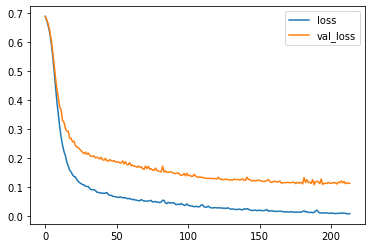

In [41]:
modelloss.plot()

In [42]:
#eğer hala memnun değilsek dropout var
#dropout.layers
model=Sequential()
model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))
# son nerona sigmoid verilirse 0 veya 1
model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")
#loss eskisen mse idi ama şuan 0 veya 1 ile işlem yapıyoruz


In [43]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlystopping])

Epoch 1/700
12/12 [==============================] - 0s 24ms/step - loss: 0.7128 - val_loss: 0.6906
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6790 - val_loss: 0.6877
Epoch 3/700
12/12 [==============================] - 0s 4ms/step - loss: 0.7132 - val_loss: 0.6856
Epoch 4/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6672 - val_loss: 0.6832
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6802 - val_loss: 0.6824
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6777 - val_loss: 0.6806
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6834 - val_loss: 0.6788
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6661 - val_loss: 0.6764
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6873 - val_loss: 0.6756
Epoch 10/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6638 - val_loss: 0.6745
Epoch 11

12/12 [==============================] - 0s 5ms/step - loss: 0.3013 - val_loss: 0.3156
Epoch 84/700
12/12 [==============================] - 0s 6ms/step - loss: 0.3102 - val_loss: 0.3174
Epoch 85/700
12/12 [==============================] - 0s 5ms/step - loss: 0.2856 - val_loss: 0.3235
Epoch 86/700
12/12 [==============================] - 0s 5ms/step - loss: 0.3397 - val_loss: 0.3143
Epoch 87/700
12/12 [==============================] - 0s 5ms/step - loss: 0.2715 - val_loss: 0.3248
Epoch 88/700
12/12 [==============================] - 0s 5ms/step - loss: 0.3141 - val_loss: 0.3340
Epoch 89/700
12/12 [==============================] - 0s 7ms/step - loss: 0.2539 - val_loss: 0.3292
Epoch 90/700
12/12 [==============================] - 0s 8ms/step - loss: 0.2792 - val_loss: 0.3187
Epoch 91/700
12/12 [==============================] - 0s 7ms/step - loss: 0.3006 - val_loss: 0.3053
Epoch 92/700
12/12 [==============================] - 0s 6ms/step - loss: 0.2950 - val_loss: 0.3165
Epoch 93/700


<AxesSubplot:>

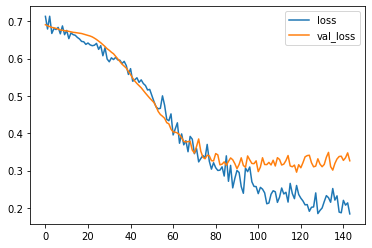

In [44]:
modelloss=pd.DataFrame(model.history.history)
modelloss.plot()

In [45]:
#x_test dizi
tahminler=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [46]:
tahminler

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
    

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(y_test,tahminler))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        91
           1       0.86      0.82      0.84        74

    accuracy                           0.86       165
   macro avg       0.86      0.86      0.86       165
weighted avg       0.86      0.86      0.86       165



In [54]:
print(confusion_matrix(y_test,tahminler))

[[81 10]
 [13 61]]
